In [1]:
#Kütüphaneler
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , recall_score, f1_score, precision_score, confusion_matrix
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#veri seti yükleme 
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [3]:
# Split features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# NAIVE BAYES CLASSIFIER

In [4]:
# sınıflandırma tanımlama
classifier =GaussianNB()
    

In [5]:
# Perform k-fold cross-validation and evaluate the classifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

In [6]:

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

In [7]:

# Calculate the average scores
avg_accuracy = np.mean(accuracy_scores)
avg_recall = np.mean(recall_scores)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)


In [8]:
# Print the results
print("Average Accuracy:", avg_accuracy)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)
print("Average Precision:", avg_precision)
print("\nAverage Confusion Matrix:")
print(avg_confusion_matrix)

Average Accuracy: 0.7632060407340633
Average Recall: 0.7632060407340633
Average F1-Score: 0.7610142667108104
Average Precision: 0.7640368993316095

Average Confusion Matrix:
[[6.170e+01 1.000e-01 5.230e+01 0.000e+00 1.370e+01 0.000e+00 4.400e+00]
 [0.000e+00 5.220e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.630e+01 4.000e-01 1.287e+02 0.000e+00 7.100e+00 0.000e+00 5.000e-01]
 [0.000e+00 0.000e+00 0.000e+00 2.966e+02 0.000e+00 4.160e+01 1.640e+01]
 [6.000e+00 0.000e+00 8.500e+00 4.100e+00 1.504e+02 0.000e+00 2.380e+01]
 [1.600e+00 0.000e+00 0.000e+00 2.970e+01 1.900e+00 1.441e+02 2.540e+01]
 [0.000e+00 0.000e+00 0.000e+00 1.280e+01 2.190e+01 2.380e+01 2.051e+02]]


In [9]:
# Visualize the evaluation results
metrics = ['Accuracy', 'Recall', 'F1-Score', 'Precision']
values = [avg_accuracy, avg_recall, avg_f1_score, avg_precision]


Değerlendirme Metrikleri için Çubuk Grafik: 
Kod, ortalama doğruluk, geri çağırma, F1 puanı ve kesinlik puanlarını gösteren bir çubuk grafik oluşturur. X ekseni değerlendirme metriklerini temsil eder ve y ekseni puan değerlerini temsil eder. Her bir çubuk, performansın görsel olarak karşılaştırılmasına izin veren farklı bir metriğe karşılık gelir.

Ortalama Karışıklık Matrisi için Isı Haritası: 
Kod, seabornortalama karışıklık matrisini görselleştirmek için kitaplığı kullanarak bir ısı haritası oluşturur. Isı haritası, karışıklık matrisinin renk kodlu bir temsilini sağlar; burada her hücre, doğru veya yanlış tahmin edilen örnek sayısını temsil eder. X ekseni tahmin edilen etiketleri temsil eder ve y ekseni gerçek etiketleri temsil eder.

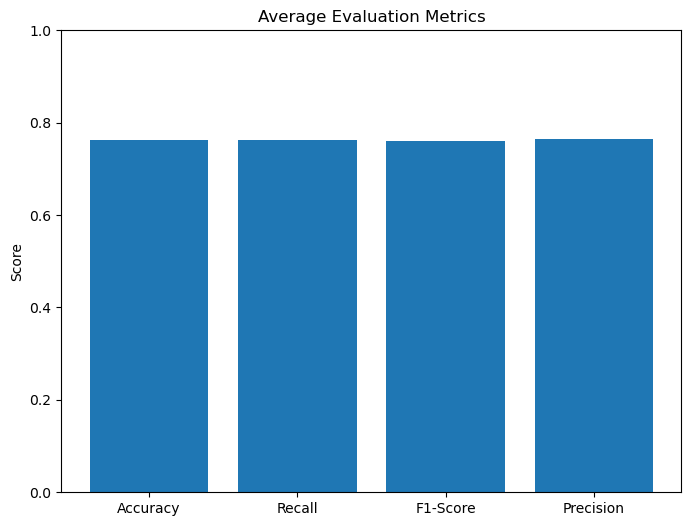

In [10]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.title('Average Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()



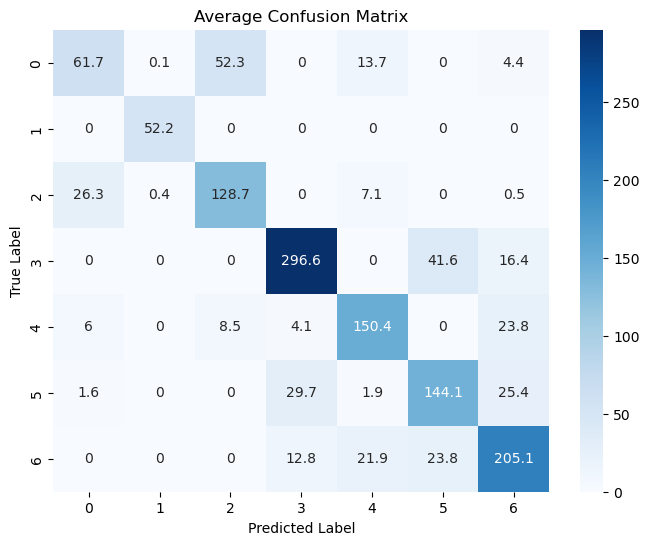

In [11]:
# Create a heatmap for the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Gerekli kitaplıkları içe aktarma:

pandas(olarak içe aktarılmıştır pd): Veri işleme ve analizi için güçlü bir kitaplık.
numpy(olarak içe aktarılır np): Matematiksel işlemler ve dizi işleme için bir kitaplık.
sklearn(scikit-learn): Python'da çeşitli algoritmalar ve değerlendirme ölçümleri sağlayan popüler bir makine öğrenimi kitaplığı.
Kuru Fasulye Veri Kümesini Yükleme:

Kod, adresinden işlevi kullanarak sağlanan URL'den Kuru Fasulye Veri Kümesine read_csverişir pandas. DataFrameVeri kümesi, adlı bir nesnede saklanır df.

Özellikleri ve hedef değişkeni çıkarma:

Kod, özellikleri (bağımsız değişkenler) ve hedef değişkeni (bağımlı değişken) veri kümesinden ayırır. Özellikler değişkende saklanır Xve hedef değişken değişkende saklanır y.

Naive Bayes sınıflandırıcısını başlatma:

GaussianNBKod , scikit-learn'deki sınıfı kullanarak Gauss Naive Bayes sınıflandırıcısının bir örneğini başlatır . Bu sınıflandırıcı, sürekli özelliklere sahip veri kümeleri için uygundur.

K-katlı çapraz doğrulama gerçekleştirme ve sınıflandırıcıyı değerlendirme:

Kod, veri kümesini eğitim ve test kümelerine bölmek için k-katlı çapraz doğrulama kullanır. Katlama sayısı ( k) 5 olarak ayarlanmıştır, bu da veri setinin çapraz doğrulama için 5 parçaya bölüneceğini belirtir.

Her katlamada, sınıflandırıcı eğitim setinde eğitilir ve test setinde test edilir. Tahmin edilen etiketler ( ), çeşitli değerlendirme metriklerini hesaplamak için y_predgerçek etiketlerle ( ) karşılaştırılır .y_test

Değerlendirme metriklerinin hesaplanması:

Kod, her kat için aşağıdaki değerlendirme ölçümlerini hesaplar:

accuracy_score: Doğru tahmin edilen etiketlerin toplam örnek sayısına oranını ölçer.
recall_score: Gerçek pozitif tahminlerin gerçek pozitifler ve yanlış negatiflerin toplamına oranı olan hatırlamayı hesaplar.
f1_score: Kesinlik ve geri çağırmanın harmonik ortalaması olan F1 puanını hesaplar.
precision_score: Gerçek pozitif tahminlerin gerçek pozitifler ve yanlış pozitiflerin toplamına oranı olan kesinliği hesaplar.
confusion_matrix: Doğru ve yanlış tahminlerin sayısını özetleyen karışıklık matrisini oluşturur.
Ortalama puanların hesaplanması:

numpyKod, işlevleri ( ) kullanarak tüm katlardaki değerlendirme ölçütlerinin ortalama puanlarını hesaplar np.mean. Bu, sınıflandırıcı için genel bir performans ölçüsü sağlar.

Sonuçları yazdırma:

Kod, Dry Bean Veri Kümesi üzerindeki Naive Bayes sınıflandırıcısının performansını özetleyen ortalama doğruluk, hatırlama, F1 puanı, kesinlik ve ortalama karışıklık matrisini yazdırır.

Sağlanan kod, k-katlı çapraz doğrulama kullanarak Naive Bayes sınıflandırıcısının kapsamlı bir değerlendirmesine izin verir ve doğruluk, geri çağırma, F1 puanı, kesinlik ve karışıklık matrisi açısından performansı hakkında bilgi sağlar.

# DECISION TREE CLASSİFİER

In [12]:
# sınıflandırma tanımlama
classifier = DecisionTreeClassifier(random_state=42)

In [13]:
# Perform k-fold cross-validation and evaluate the classifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

In [14]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

In [15]:
# Calculate the average scores
avg_accuracy = np.mean(accuracy_scores)
avg_recall = np.mean(recall_scores)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

In [16]:
# Print the results
print("Average Accuracy:", avg_accuracy)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)
print("Average Precision:", avg_precision)
print("\nAverage Confusion Matrix:")
print(avg_confusion_matrix)

Average Accuracy: 0.8947172168689128
Average Recall: 0.8947172168689128
Average F1-Score: 0.8947261886557776
Average Precision: 0.8950851611656059

Average Confusion Matrix:
[[1.193e+02 1.000e-01 8.100e+00 0.000e+00 1.000e+00 1.300e+00 2.400e+00]
 [1.000e-01 5.200e+01 1.000e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [7.600e+00 0.000e+00 1.497e+02 0.000e+00 4.500e+00 2.000e-01 1.000e+00]
 [1.000e-01 0.000e+00 0.000e+00 3.127e+02 2.300e+00 7.000e+00 3.250e+01]
 [1.800e+00 0.000e+00 4.200e+00 1.900e+00 1.791e+02 0.000e+00 5.800e+00]
 [1.800e+00 0.000e+00 4.000e-01 7.000e+00 0.000e+00 1.877e+02 5.800e+00]
 [3.000e+00 0.000e+00 1.400e+00 2.940e+01 6.300e+00 6.200e+00 2.173e+02]]


In [17]:
# Visualize the evaluation results
metrics = ['Accuracy', 'Recall', 'F1-Score', 'Precision']
values = [avg_accuracy, avg_recall, avg_f1_score, avg_precision]


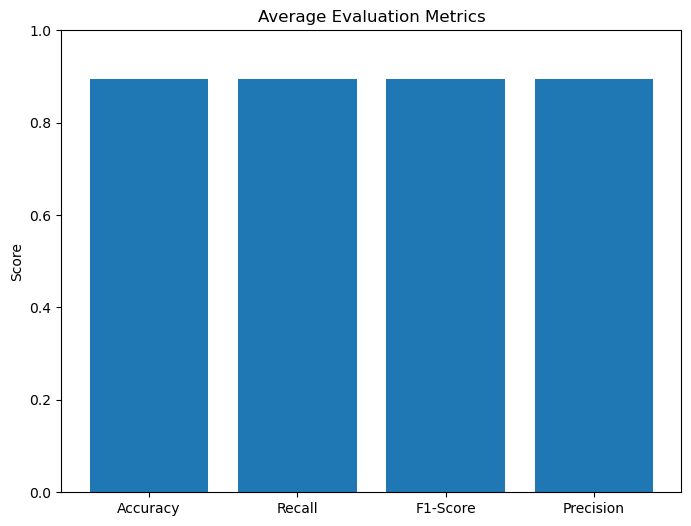

In [18]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.title('Average Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()



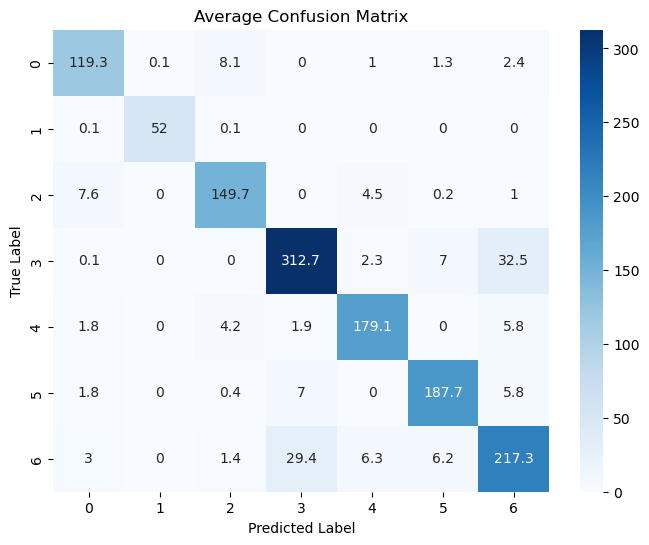

In [19]:
# Create a heatmap for the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SUPPORT VECTOR MACHINE CLASSIFICATION

In [20]:
# Create an SVM classifier
classifier = SVC()

In [21]:
# Perform k-fold cross-validation and evaluate the classifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

In [22]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

In [23]:
# Calculate the average scores
avg_accuracy = np.mean(accuracy_scores)
avg_recall = np.mean(recall_scores)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

In [24]:
# Print the results
print("Average Accuracy:", avg_accuracy)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)
print("Average Precision:", avg_precision)
print("\nAverage Confusion Matrix:")
print(avg_confusion_matrix)

Average Accuracy: 0.6350740849832927
Average Recall: 0.6350740849832927
Average F1-Score: 0.5996095185795342
Average Precision: 0.6121779447436728

Average Confusion Matrix:
[[6.900e+00 0.000e+00 8.910e+01 0.000e+00 3.180e+01 0.000e+00 4.400e+00]
 [1.000e-01 5.200e+01 1.000e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [5.300e+00 0.000e+00 1.432e+02 0.000e+00 1.400e+01 0.000e+00 5.000e-01]
 [0.000e+00 0.000e+00 0.000e+00 3.008e+02 0.000e+00 4.130e+01 1.250e+01]
 [4.000e+00 0.000e+00 1.010e+01 3.300e+00 1.142e+02 5.600e+00 5.560e+01]
 [0.000e+00 0.000e+00 0.000e+00 6.980e+01 4.700e+00 5.360e+01 7.460e+01]
 [0.000e+00 0.000e+00 0.000e+00 1.390e+01 2.340e+01 3.260e+01 1.937e+02]]


In [25]:
# Visualize the evaluation results
metrics = ['Accuracy', 'Recall', 'F1-Score', 'Precision']
values = [avg_accuracy, avg_recall, avg_f1_score, avg_precision]


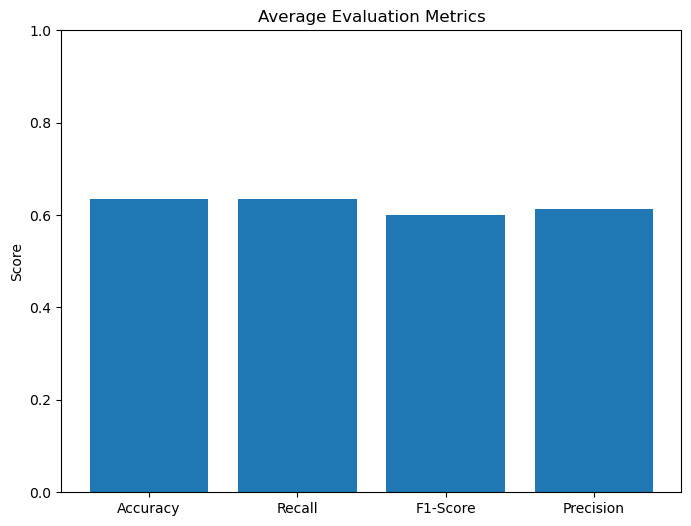

In [26]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.title('Average Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()


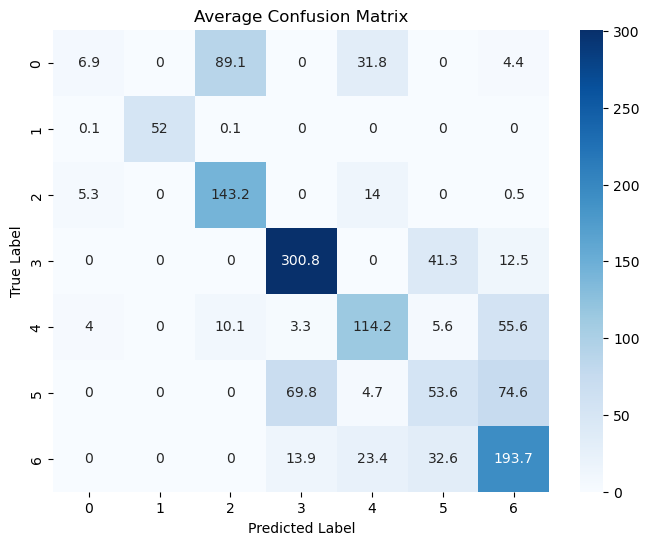

In [27]:
# Create a heatmap for the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RANDOM FOREST CLASSIFICATION 

In [28]:
# Create a Random Forest classifier with 100 trees
classifier = RandomForestClassifier(n_estimators=100)

In [29]:
# Perform k-fold cross-validation and evaluate the classifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

In [30]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

In [31]:
# Calculate the average scores
avg_accuracy = np.mean(accuracy_scores)
avg_recall = np.mean(recall_scores)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

In [32]:
# Print the results
print("Average Accuracy:", avg_accuracy)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)
print("Average Precision:", avg_precision)
print("\nAverage Confusion Matrix:")
print(avg_confusion_matrix)

Average Accuracy: 0.9249869718754349
Average Recall: 0.9249869718754349
Average F1-Score: 0.9249075169595022
Average Precision: 0.9252668463479882

Average Confusion Matrix:
[[1.205e+02 1.000e-01 7.000e+00 1.000e-01 7.000e-01 1.200e+00 2.600e+00]
 [2.000e-01 5.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [5.100e+00 0.000e+00 1.528e+02 0.000e+00 3.500e+00 4.000e-01 1.200e+00]
 [0.000e+00 0.000e+00 0.000e+00 3.301e+02 7.000e-01 5.300e+00 1.850e+01]
 [9.000e-01 0.000e+00 2.800e+00 1.100e+00 1.833e+02 0.000e+00 4.700e+00]
 [6.000e-01 0.000e+00 0.000e+00 5.200e+00 0.000e+00 1.921e+02 4.800e+00]
 [9.000e-01 0.000e+00 5.000e-01 2.630e+01 4.100e+00 3.600e+00 2.282e+02]]


In [33]:
# Visualize the evaluation results
metrics = ['Accuracy', 'Recall', 'F1-Score', 'Precision']
values = [avg_accuracy, avg_recall, avg_f1_score, avg_precision]


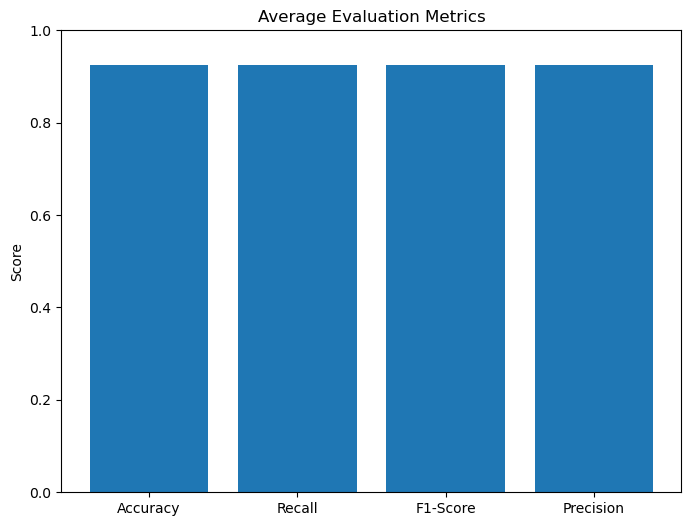

In [34]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.title('Average Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()

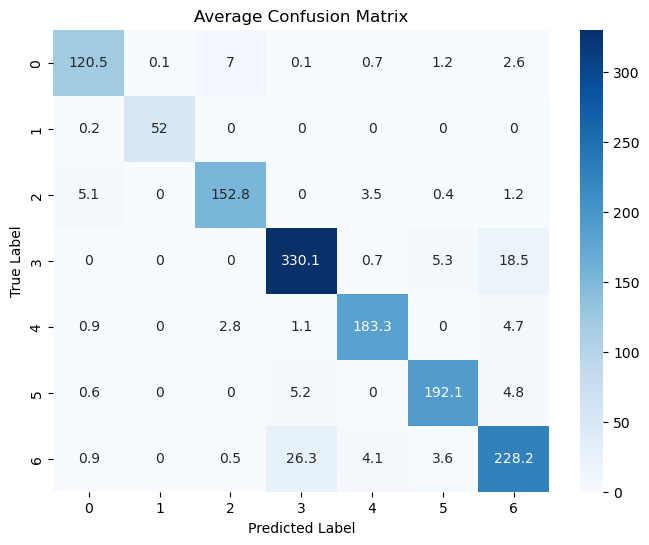

In [35]:
# Create a heatmap for the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# K-NEAREST NEIGHBOOR CLASSIFICATION 

In [36]:
# Create a KNN classifier with k=10
classifier = KNeighborsClassifier(n_neighbors=10)

In [37]:
# Perform k-fold cross-validation and evaluate the classifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

In [38]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

C:\Users\cemre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\cemre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [39]:
# Calculate the average scores
avg_accuracy = np.mean(accuracy_scores)
avg_recall = np.mean(recall_scores)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

In [40]:
# Print the results
print("Average Accuracy:", avg_accuracy)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)
print("Average Precision:", avg_precision)
print("\nAverage Confusion Matrix:")
print(avg_confusion_matrix)

Average Accuracy: 0.7186838411334845
Average Recall: 0.7186838411334845
Average F1-Score: 0.7149971514492435
Average Precision: 0.720130271586932

Average Confusion Matrix:
[[6.910e+01 0.000e+00 3.930e+01 0.000e+00 2.010e+01 0.000e+00 3.700e+00]
 [0.000e+00 5.200e+01 2.000e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.910e+01 0.000e+00 1.024e+02 0.000e+00 1.090e+01 1.000e-01 5.000e-01]
 [0.000e+00 0.000e+00 0.000e+00 3.195e+02 2.000e-01 1.760e+01 1.730e+01]
 [1.260e+01 0.000e+00 8.800e+00 5.800e+00 1.305e+02 3.000e-01 3.480e+01]
 [3.000e-01 0.000e+00 0.000e+00 4.540e+01 3.400e+00 1.139e+02 3.970e+01]
 [5.000e-01 0.000e+00 0.000e+00 3.090e+01 2.750e+01 1.390e+01 1.908e+02]]


In [41]:
# Visualize the evaluation results
metrics = ['Accuracy', 'Recall', 'F1-Score', 'Precision']
values = [avg_accuracy, avg_recall, avg_f1_score, avg_precision]

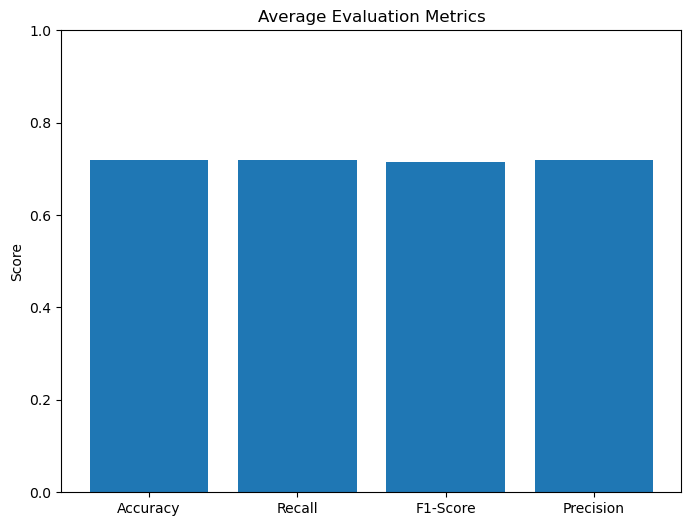

In [42]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.title('Average Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()

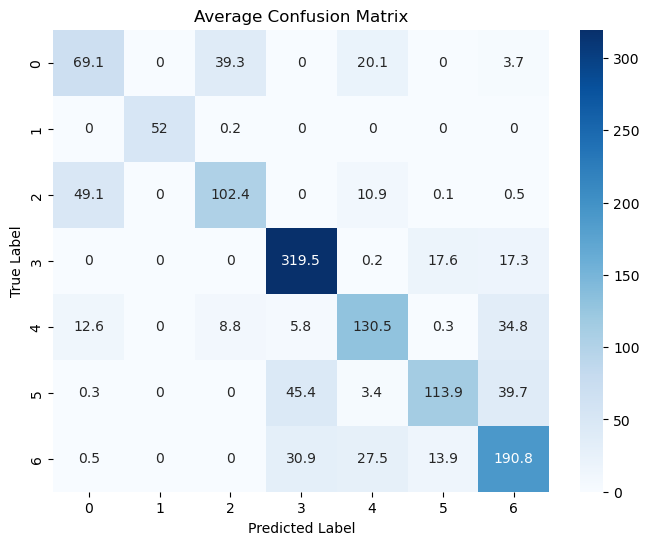

In [43]:
# Create a heatmap for the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# TABLO 4

In [44]:
#tablo oluşturmak için gerekli kütüphane
import pandas as pd

# Results of classification methods
results = {
    'Method': ['Naive Bayes','Decision Tree','Support Vector Machine','Random Forest','K-Nearest Neighbors'],
    'Accuracy': [0.7632060407340633,0.8947172168689128,0.6350740849832927,0.9239583164749942,0.7186838411334845],
    'Precision': [0.7640368993316095,0.8950851611656059,0.6121779447436728,0.9242760118942538,0.720130271586932],
    'Recall': [0.7632060407340633,0.8947172168689128,0.6350740849832927,0.9239583164749942,0.7186838411334845],
    'F-score': [0.7610142667108104,0.8947261886557776,0.5996095185795342,0.9238802174172079,0.7149971514492435]
}

# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the results table
print(df_results)

                   Method  Accuracy  Precision    Recall   F-score
0             Naive Bayes  0.763206   0.764037  0.763206  0.761014
1           Decision Tree  0.894717   0.895085  0.894717  0.894726
2  Support Vector Machine  0.635074   0.612178  0.635074  0.599610
3           Random Forest  0.923958   0.924276  0.923958  0.923880
4     K-Nearest Neighbors  0.718684   0.720130  0.718684  0.714997


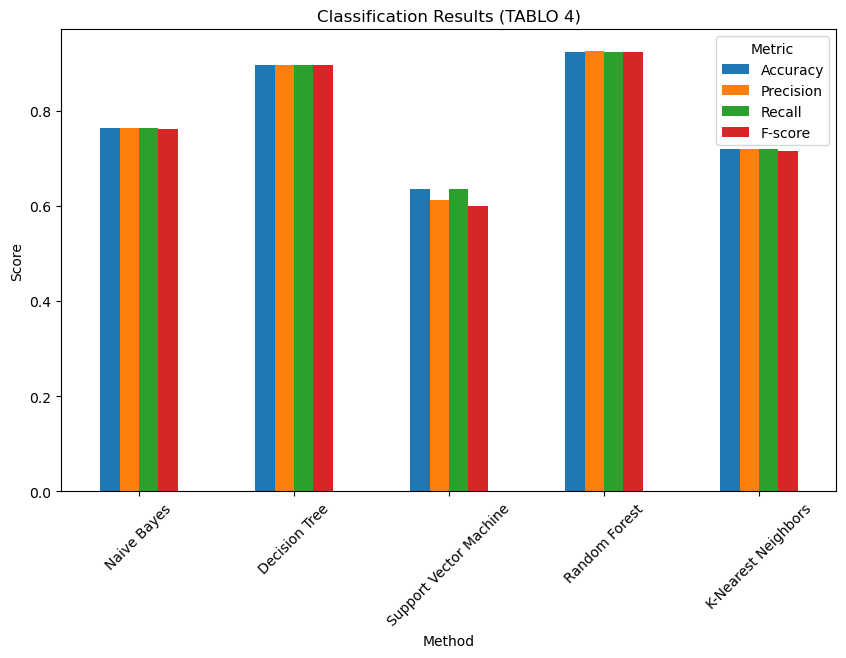

In [45]:
 # Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Set the Method column as the index
df_results.set_index('Method', inplace=True)

# Plotting the results
df_results.plot(kind='bar', rot=45, figsize=(10, 6))
plt.xlabel('Method')
plt.ylabel('Score')
plt.title('Classification Results (TABLO 4)')
plt.legend(title='Metric')
plt.show()

In [46]:

# Convert DataFrame to tabular format
table = tabulate(df_results, headers='keys', tablefmt='fancy_grid')

# Display the tabular results
print(table)

╒════════════════════════╤════════════╤═════════════╤══════════╤═══════════╕
│ Method                 │   Accuracy │   Precision │   Recall │   F-score │
╞════════════════════════╪════════════╪═════════════╪══════════╪═══════════╡
│ Naive Bayes            │   0.763206 │    0.764037 │ 0.763206 │  0.761014 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Decision Tree          │   0.894717 │    0.895085 │ 0.894717 │  0.894726 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Support Vector Machine │   0.635074 │    0.612178 │ 0.635074 │  0.59961  │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Random Forest          │   0.923958 │    0.924276 │ 0.923958 │  0.92388  │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ K-Nearest Neighbors    │   0.718684 │    0.72013  │ 0.718684 │  0.714997 │
╘════════════════════════╧════════════╧═════════════╧══════════╧═══════════╛

# REGRESYON MODELLERİ

# LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()

In [56]:
# Perform k-fold cross-validation and evaluate the classifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

In [57]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

C:\Users\cemre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\cemre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [61]:
# Calculate the average scores


avg_accuracy = sum(accuracy_scores) /k
avg_recall = np.mean(recall_scores)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

In [62]:
# Print the results
print("Average Accuracy:", avg_accuracy)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)
print("Average Precision:", avg_precision)
print("\nAverage Confusion Matrix:")
print(avg_confusion_matrix)

Average Accuracy: 0.7186838411334845
Average Recall: 0.7186838411334845
Average F1-Score: 0.7149971514492435
Average Precision: 0.720130271586932

Average Confusion Matrix:
[[6.910e+01 0.000e+00 3.930e+01 0.000e+00 2.010e+01 0.000e+00 3.700e+00]
 [0.000e+00 5.200e+01 2.000e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.910e+01 0.000e+00 1.024e+02 0.000e+00 1.090e+01 1.000e-01 5.000e-01]
 [0.000e+00 0.000e+00 0.000e+00 3.195e+02 2.000e-01 1.760e+01 1.730e+01]
 [1.260e+01 0.000e+00 8.800e+00 5.800e+00 1.305e+02 3.000e-01 3.480e+01]
 [3.000e-01 0.000e+00 0.000e+00 4.540e+01 3.400e+00 1.139e+02 3.970e+01]
 [5.000e-01 0.000e+00 0.000e+00 3.090e+01 2.750e+01 1.390e+01 1.908e+02]]


# DECISION TREE REGRESSION

 bir sınıflandırma veri kümesinde bir regresyon modeli kullanmanın, doğruluk veya tahmin performansı açısından anlamlı veya yorumlanabilir sonuçlar vermeyebileceğini not etmek önemlidir.

Bir sınıflandırma görevinde, hedef değişken ayrık sınıflardan oluşur ve amaç, sınıf etiketlerini tahmin etmektir. Öte yandan, regresyon modelleri sürekli sayısal değerleri tahmin etmek için tasarlanmıştır. Bu nedenle Karar Ağacı Regresyonu gibi bir regresyon modelini bir sınıflandırma problemine uygulamak uygun olmayabilir ve sonuçların yanlış yorumlanmasına yol açabilir.